### 1. Installing dependencies

In [4]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### 2. Getting the data from directory 

In [3]:
file_path = 'Dataset'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Mild_Demented' 'Moderate_Demented' 'Non_Demented' 'Very_Mild_Demented']


### 3. Visualizing random images with labels from the data

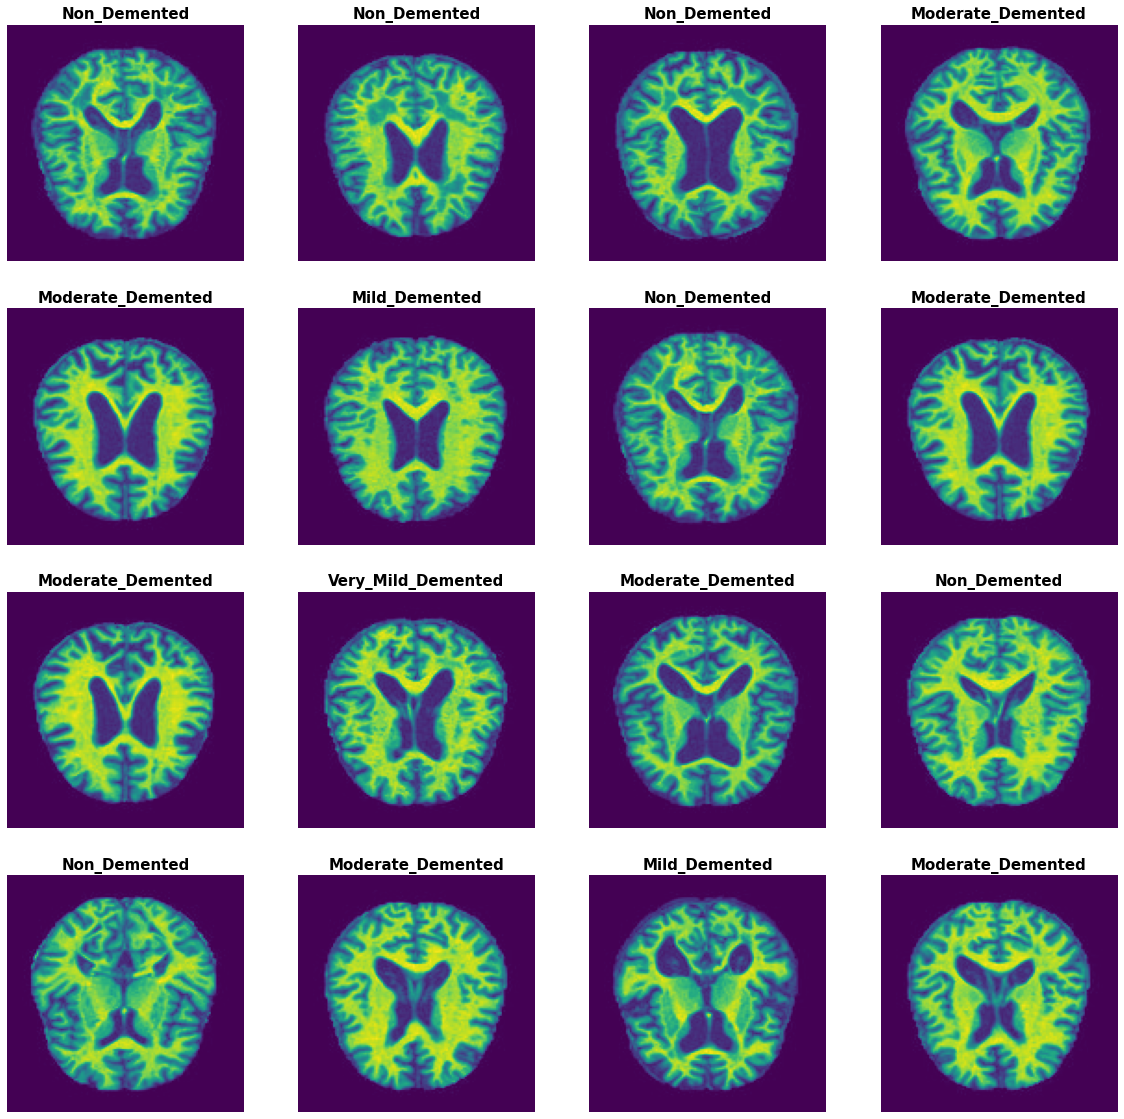

In [4]:
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

### 4. Preparing the dataset for building CNN

In [5]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


### 5. Building the model

In [6]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

### 6. Fitting the model

In [7]:
history = model.fit(X_train, epochs = 50, validation_data=X_validation, verbose=1)

Epoch 1/50
160/160 [==============================] - 30s 179ms/step - loss: 1.0012 - accuracy: 0.5197 - val_loss: 0.9309 - val_accuracy: 0.5523
Epoch 2/50
160/160 [==============================] - 27s 169ms/step - loss: 0.8336 - accuracy: 0.6172 - val_loss: 0.7746 - val_accuracy: 0.6578
Epoch 3/50
160/160 [==============================] - 28s 177ms/step - loss: 0.6629 - accuracy: 0.7131 - val_loss: 0.6435 - val_accuracy: 0.7258
Epoch 4/50
160/160 [==============================] - 30s 187ms/step - loss: 0.4797 - accuracy: 0.8006 - val_loss: 0.4389 - val_accuracy: 0.8070
Epoch 5/50
160/160 [==============================] - 29s 183ms/step - loss: 0.3303 - accuracy: 0.8613 - val_loss: 0.4117 - val_accuracy: 0.8328
Epoch 6/50
160/160 [==============================] - 29s 183ms/step - loss: 0.2218 - accuracy: 0.9156 - val_loss: 0.2727 - val_accuracy: 0.8898
Epoch 7/50
160/160 [==============================] - 30s 187ms/step - loss: 0.1423 - accuracy: 0.9514 - val_loss: 0.2354 - val_ac

### 7. Model evaluation

In [8]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

40/40 [==============================] - 3s 82ms/step - loss: 0.0767 - accuracy: 0.9859
Accuracy: % 98.59
Loss: % 7.67


[]

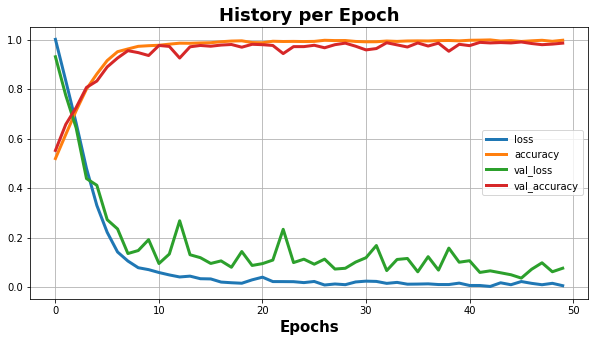

In [9]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

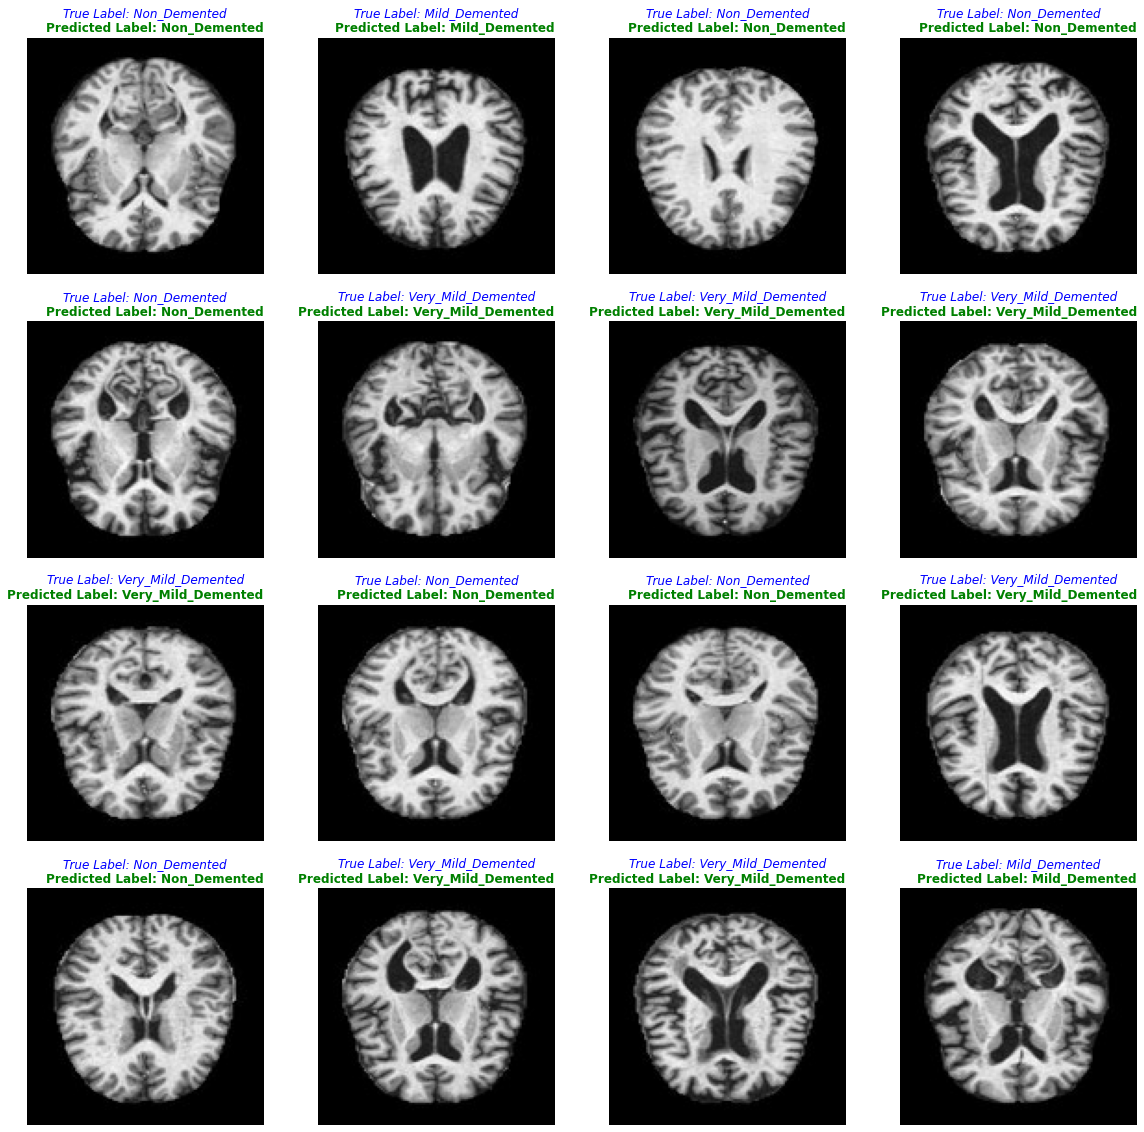

In [10]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [12]:
# Assuming 'model' is your trained CNN model
#model.save('alzheimer_detection_model.h5')  # Save the model to a directory

True label: Test Images\mild.jpg
Predicted class: Mild_Demented


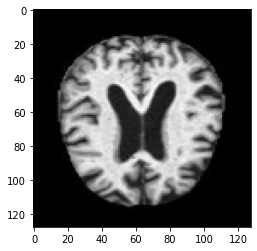

True label: Test Images\mild_2.jpg
Predicted class: Mild_Demented


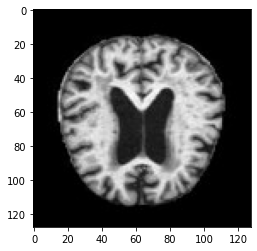

True label: Test Images\moderate.jpg
Predicted class: Moderate_Demented


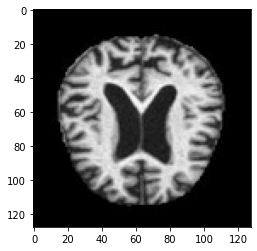

True label: Test Images\moderate_2.jpg
Predicted class: Moderate_Demented


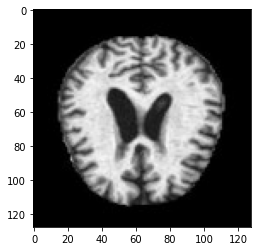

True label: Test Images\non.jpg
Predicted class: Non_Demented


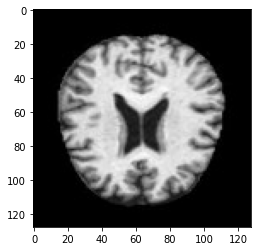

True label: Test Images\non_2.jpg
Predicted class: Non_Demented


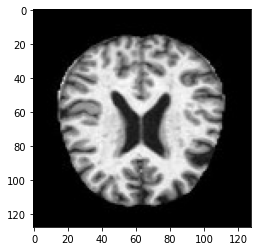

True label: Test Images\verymild.jpg
Predicted class: Very_Mild_Demented


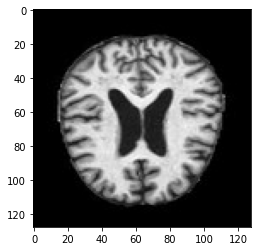

True label: Test Images\verymild_2.jpg
Predicted class: Very_Mild_Demented


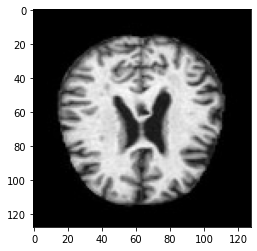

In [16]:
# Get the class names
class_names = np.array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'])

model = keras.models.load_model('alzheimer_detection_model.h5')

for subdir, dir, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith('.jpg') or file_path.endswith('.jpeg') or file_path.endswith('.png'):
            # Load the image using PIL library
            image = Image.open(file_path)
            image = image.resize((128, 128))  # Resize the image to 128x128 pixels
            # Convert grayscale to RGB format
            image = image.convert("RGB")
            img = np.array(image).reshape(-1, 128, 128, 3)  # Reshape to (batch_size, height, width, channels)
            result = loaded_model.predict(img)

            print("True label:", file_path)

            predicted_class_index = np.argmax(result)
            predicted_class = class_names[predicted_class_index]
            print("Predicted class:", predicted_class)

            test_img = cv2.imread(file_path)
            plt.imshow(test_img)
            plt.show()
